In [1]:
import os 
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:
human_df = pd.read_csv('./results/results_human.csv')
human_df['country_pair'] = human_df['p'] + '-' + human_df['q']
human_df['sim_diff'] =  human_df['s(pq)'] - human_df['s(qp)']
human_df.drop(columns=['p', 'q', 'P', 'd(pq)', 'd(qp)'], inplace=True)
human_df.rename(columns={'s(pq)': 'sim_score_1', 's(qp)': 'sim_score_2'}, inplace=True)
human_df['model_name'] = 'human'
human_df['p-values'] = None
human_df

,sim_score_1,sim_score_2,country_pair,sim_diff,model_name,p-values
0,6.46,7.65,U.S.A.-Mexico,-1.19,human,None
1,15.12,15.18,U.S.S.R.-Poland,-0.06,human,None
2,8.69,9.16,China-Albania,-0.47,human,None
3,9.70,10.65,U.S.A.-Israel,-0.95,human,None
4,12.37,11.95,Japan-Philippines,0.42,human,None
5,16.96,17.33,U.S.A.-Canada,-0.37,human,None
6,3.41,3.69,U.S.S.R.-Israel,-0.28,human,None
7,13.32,13.49,England-Ireland,-0.17,human,None
8,15.60,15.20,Germany-Austria,0.40,human,None
9,5.21,5.03,U.S.S.R.-France,0.18,human,None


In [47]:

# Specify the directory containing the CSV files
directory_path = 'results/results_single_all_models_factor_based.csv'
df = pd.read_csv(directory_path)
# df

directory_path_2 = 'results/results_single_all_models_factor_economy.csv'
df2 = pd.read_csv(directory_path_2)
df2

,country_pair,prompt_style,model_name,temperature,sim_score_1,sim_score_2,sim_diff
0,U.S.A.-Mexico,SSD,gpt-3.5-turbo,0.001,15,15,0
1,U.S.S.R.-Poland,SSD,gpt-3.5-turbo,0.001,15,10,5
2,China-Albania,SSD,gpt-3.5-turbo,0.001,5,10,-5
3,U.S.A.-Israel,SSD,gpt-3.5-turbo,0.001,15,15,0
4,Japan-Philippines,SSD,gpt-3.5-turbo,0.001,15,15,0
...,...,...,...,...,...,...,...
247,England-Jordan,SSA,gpt-3.5-turbo,1.500,8,15,-7
248,France-Israel,SSA,gpt-3.5-turbo,1.500,15,15,0
249,U.S.A.-Germany,SSA,gpt-3.5-turbo,1.500,15,15,0
250,U.S.S.R.-Syria,SSA,gpt-3.5-turbo,1.500,8,15,-7


In [48]:
grouped_df = df2.groupby(by='prompt_style')
grouped_df.get_group('SSA')

,country_pair,prompt_style,model_name,temperature,sim_score_1,sim_score_2,sim_diff
168,U.S.A.-Mexico,SSA,gpt-3.5-turbo,0.001,15,15,0
169,U.S.S.R.-Poland,SSA,gpt-3.5-turbo,0.001,15,10,5
170,China-Albania,SSA,gpt-3.5-turbo,0.001,5,10,-5
171,U.S.A.-Israel,SSA,gpt-3.5-turbo,0.001,15,15,0
172,Japan-Philippines,SSA,gpt-3.5-turbo,0.001,15,15,0
...,...,...,...,...,...,...,...
247,England-Jordan,SSA,gpt-3.5-turbo,1.500,8,15,-7
248,France-Israel,SSA,gpt-3.5-turbo,1.500,15,15,0
249,U.S.A.-Germany,SSA,gpt-3.5-turbo,1.500,15,15,0
250,U.S.S.R.-Syria,SSA,gpt-3.5-turbo,1.500,8,15,-7


In [ ]:
grouped_df = df.groupby(by='prompt_style')
dfs = []
dfs.append(('SSD', grouped_df.get_group('SSD')))
dfs.append(('SST', grouped_df.get_group('SST')))
dfs.append(('SSA', grouped_df.get_group('SSA')))

llm_human_dfs = []
for file, _df in dfs:
    print(file)
    final_df = pd.concat([df, human_df]).reset_index(drop=['index'])
    llm_human_dfs.append((file, final_df))
llm_human_dfs

In [49]:
grouped_df2 = df2.groupby(by='prompt_style')
dfs2 = []
dfs2.append(('SSD', grouped_df2.get_group('SSD')))
dfs2.append(('SST', grouped_df2.get_group('SST')))
dfs2.append(('SSA', grouped_df2.get_group('SSA')))

llm_human_dfs2 = []
for file, _df in dfs2:
    print(file)
    final_df = pd.concat([_df, human_df]).reset_index(drop=['index'])
    llm_human_dfs2.append((file, final_df))
llm_human_dfs2

SSD
SST
SSA


[('SSD',
            country_pair prompt_style     model_name  temperature  sim_score_1  \
  0        U.S.A.-Mexico          SSD  gpt-3.5-turbo        0.001         15.0   
  1      U.S.S.R.-Poland          SSD  gpt-3.5-turbo        0.001         15.0   
  2        China-Albania          SSD  gpt-3.5-turbo        0.001          5.0   
  3        U.S.A.-Israel          SSD  gpt-3.5-turbo        0.001         15.0   
  4    Japan-Philippines          SSD  gpt-3.5-turbo        0.001         15.0   
  ..                 ...          ...            ...          ...          ...   
  100                NaN          NaN            NaN          NaN          NaN   
  101                NaN          NaN            NaN          NaN          NaN   
  102                NaN          NaN            NaN          NaN          NaN   
  103                NaN          NaN            NaN          NaN          NaN   
  104                NaN          NaN            NaN          NaN          NaN   
  
    

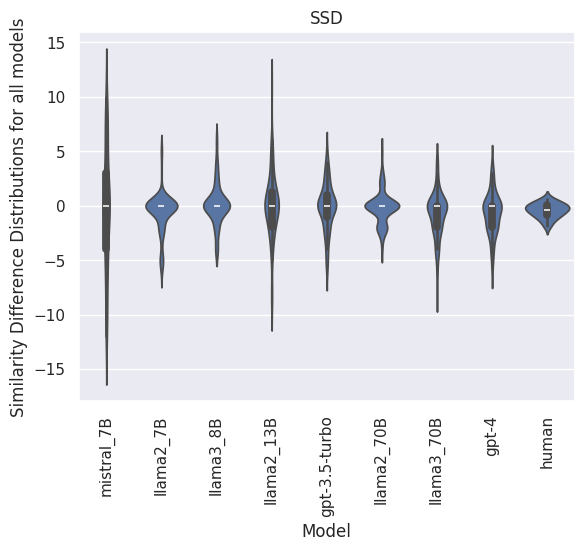

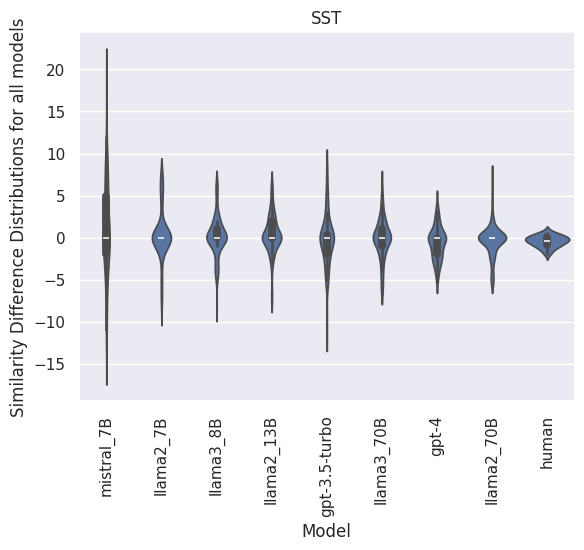

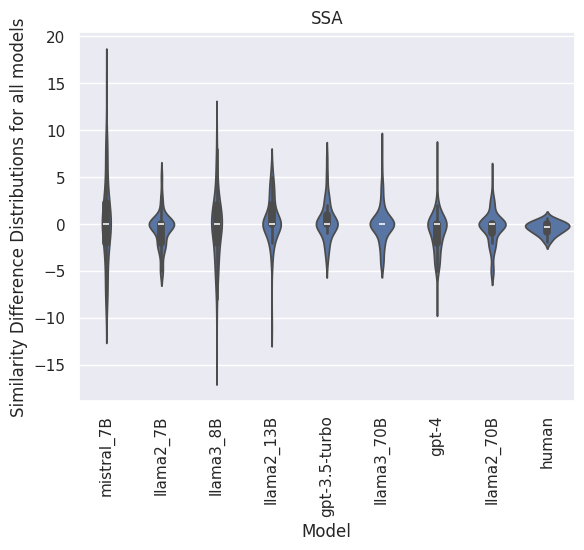

In [35]:
for file, results_df in llm_human_dfs:
    
    sns.set_theme(style="darkgrid")
    filtered_df = results_df
    # print(type(filtered_df))
    # results_df = results_df.query('temperature == 0.001')
    # result_df = result_df.drop(columns=['Unnamed: 0'])
    # if 'single' in file.split('_'):
    #     final_df = pd.concat([results_df, human_df]).reset_index(drop=['index'])
    # else:
    #     final_df = results_df
    # print(final_df)
    # required_df = final_df.query(('model_name == "llama3_8B" and temperature == 0.001') or ('model_name == "llama3_8B" and temperature == 0.5') or ('model_name == "gpt-4" and temperature == 0.5') )
    # required_df = final_df.query('model_name == "llama3_8B" and temperature == 0.001')
#     filtered_df = final_df.query(
#     '(model_name == "llama3_8B" and temperature == 0.001) or '
#     '(model_name == "llama3_8B" and temperature == 0.5) or '
#     '(model_name == "gpt-4" and temperature == 0.5) or '
#     '(model_name == "human")'
# )
    # print(filtered_df[['country_pair', 'model_name', 'temperature']])
    # Grouped violinplot
    # print(f'for file name {file}..')
    # print(final_df.head())
    
    ax = sns.violinplot(x=filtered_df["model_name"], y=filtered_df["sim_diff"])
    # ax = sns.violinplot(x="day", y="total_bill", data=tips)

    # Set the title and labels
    ax.set_title(file)
    ax.set_xlabel('Model')
    ax.set_ylabel('Similarity Difference Distributions for all models')

    plt.xticks(rotation=90)
    plt.show()

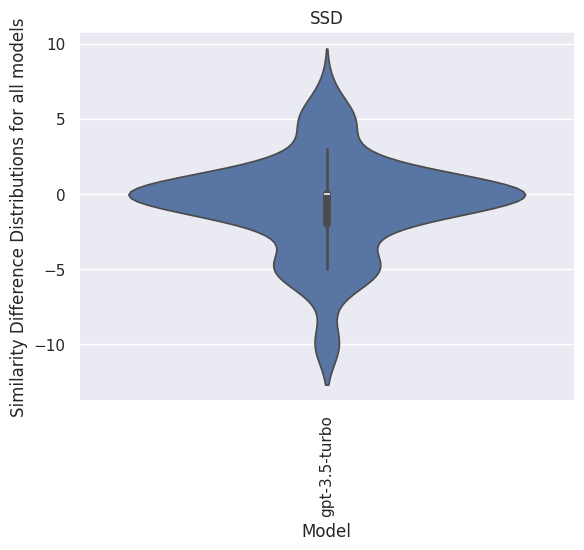

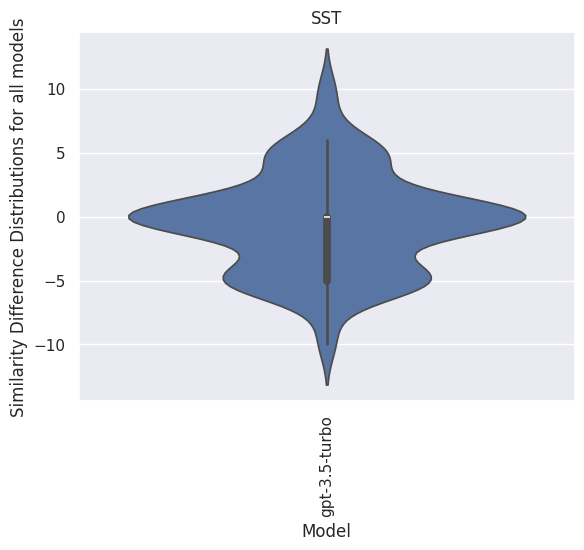

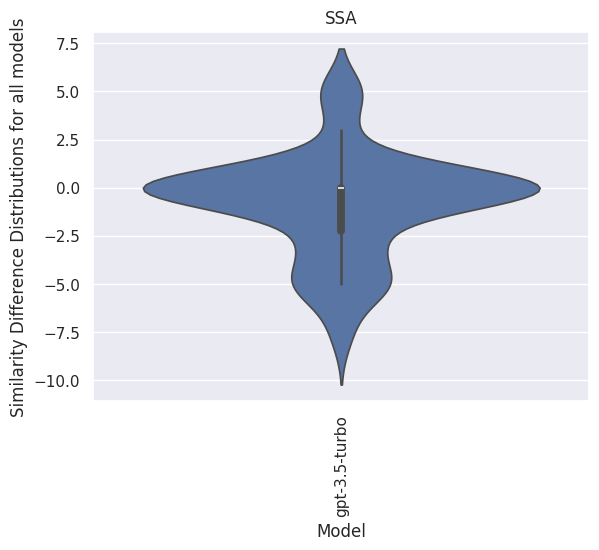

In [50]:
for file, results_df in llm_human_dfs2:
    
    sns.set_theme(style="darkgrid")
    filtered_df = results_df
    # print(type(filtered_df))
    # results_df = results_df.query('temperature == 0.001')
    # result_df = result_df.drop(columns=['Unnamed: 0'])
    # if 'single' in file.split('_'):
    #     final_df = pd.concat([results_df, human_df]).reset_index(drop=['index'])
    # else:
    #     final_df = results_df
    # print(final_df)
    # required_df = final_df.query(('model_name == "llama3_8B" and temperature == 0.001') or ('model_name == "llama3_8B" and temperature == 0.5') or ('model_name == "gpt-4" and temperature == 0.5') )
    # required_df = final_df.query('model_name == "llama3_8B" and temperature == 0.001')
#     filtered_df = final_df.query(
#     '(model_name == "llama3_8B" and temperature == 0.001) or '
#     '(model_name == "llama3_8B" and temperature == 0.5) or '
#     '(model_name == "gpt-4" and temperature == 0.5) or '
#     '(model_name == "human")'
# )
    # print(filtered_df[['country_pair', 'model_name', 'temperature']])
    # Grouped violinplot
    # print(f'for file name {file}..')
    # print(final_df.head())
    
    ax = sns.violinplot(x=filtered_df["model_name"], y=filtered_df["sim_diff"])
    # ax = sns.violinplot(x="day", y="total_bill", data=tips)

    # Set the title and labels
    ax.set_title(file)
    ax.set_xlabel('Model')
    ax.set_ylabel('Similarity Difference Distributions for all models')

    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# human_llm_df_ssd = human_llm_df_ssd.sort_values(by='country_pair')
# human_llm_df_ssd

In [134]:
# human_llm_df_ssd_best_models = human_llm_df_ssd.query('model_name == "llama3_8B" or model_name == "llama3_70B" or model_name == "gpt-4" or model_name == "human"')
# human_llm_df_ssd_best_models.to_csv('./results/human_llm_df_ssd_best_models.csv')

In [ ]:
# print(human_llm_df_ssd_best_models[['country_pair', 'sim_score_1', 'sim_score_2', 'sim_diff', 'model_name']].query('model_name == "human"').head(21))

In [ ]:
#initialize a plot
ax = plt.figure(figsize=(10,4))
# human_llm_df_ssd_best_models = human_llm_df_ssd.query('model_name == "llama3_8B" or model_name == "llama3_70B" or model_name == "gpt-4" or model_name == "human"')

#add start points
ax = sns.stripplot(data=human_llm_df_ssd_best_models, x= 'country_pair', y='sim_score_1', hue='model_name',orient='v', jitter=0.3, size=3, dodge=False)
x = []
y = []
color = []
for collection in ax.collections:
    # print(collection)
    # Get the offsets for each point (this contains x, y coordinates)
    offsets = collection.get_offsets()
    facecolors = collection.get_facecolors()
    for facecolor in facecolors:
        color.append(facecolor)
    # Print the y-coordinates
    # print(len(offsets))
    for offset in offsets:
        x.append(offset[0])
        y.append(offset[1])
        # print(offset)
print(len(x), len(y), len(color))

#define arrows
arrow_starts = y
arrow_lengths = list(human_llm_df_ssd_best_models['sim_diff'])
unique_country_pairs = human_llm_df_ssd_best_models['country_pair'].nunique()
#add arrows to plot
for i in range(len(x)):
    if arrow_lengths[i] == 0:
        head_length = 0
    else:
        head_length = 0.15
    # if arrow_lengths[i] > arrow_starts[i]:
    #     arrow_lengths[i] = arrow_starts[i]
    ax.arrow(x[i],  #x start point
             arrow_starts[i],  #y start point
             0, # change in x
            -arrow_lengths[i] ,          #change in y              
             head_width=0.1,         #arrow head width
             head_length=head_length,        #arrow head length
             width=0.002,              #arrow stem width
             fc=color[i],             #arrow fill color
             ec=color[i])  
    
# format plot
ax.set_title('Direction and magnitude of change in similarity scores for each country for prompt SSD (temp = 0.001)')   #add title
# ax.axvline(x=0, color='0.9', ls='--', lw=2, zorder=0) #add line at x=0
ax.grid(axis='x', color='0.8')                        #add a light grid
ax.set_ylim(0,20)                                     #set x axis limits
ax.set_ylabel('similarity scores')                                #label the x axis
ax.set_xlabel('country_pair')       
# sns.despine(left=True, bottom=True)    
# plt.grid()                #remove axes
plt.xticks(rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_legend().get_texts(), fontsize='8') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='8') # for legend title
plt.show()

In [37]:
from scipy.stats import ttest_rel
human_df = pd.read_csv('./results/results_human.csv')

# Paired t-test for s(pq) and s(qp)
t_stat, p_value = ttest_rel(human_df['s(pq)'], human_df['s(qp)'], alternative='less')
print(f'Paired t-test for s(pq) and s(qp): t-statistic={t_stat}, p-value={p_value}')

# # Paired t-test for d(pq) and d(qp)
# t_stat, p_value = ttest_rel(df['d(pq)'], df['d(qp)'])
# print(f'Paired t-test for d(pq) and d(qp): t-statistic={t_stat}, p-value={p_value}')


Paired t-test for s(pq) and s(qp): t-statistic=-2.9200112245278067, p-value=0.004233442777960982


In [39]:
dfs

'SSD'

In [41]:
all_models = list(dfs[0][1].model_name.unique())
temps = [0.001, 0.5, 1.0, 1.5]

In [51]:
all_models = ['gpt-3.5-turbo']

In [54]:
for file, results_df in dfs2:
    # if not 'single' in file.split('_'):
    #     continue
    for model in all_models:
        for temp in temps:
            final_df = results_df.query('(model_name  == @model) and (temperature == @temp)')
            # print(f'For file {file}, model {model}, temp {temp}')
            # print(final_df[['country_pair', 'model_name', 'temperature', 'sim_score_1', 'sim_score_2']])
            t_stat, p_value = ttest_rel(final_df['sim_score_1'], final_df['sim_score_2'], alternative='two-sided', nan_policy = 'omit')
            t_stat_less, p_value_less = ttest_rel(final_df['sim_score_1'], final_df['sim_score_2'], alternative='less', nan_policy = 'omit')


# Calculate p-value using t-statistic
            # import scipy
            # p_value_2 = scipy.stats.t.sf(abs(t_stat), df=degrees_of_freedom) * 2  # two-tailed test
            # print(f'For file {file}, model {model}, temp {temp}, Paired t-test for sim_score_1 and sim_score_2: t-statistic={t_stat}, p-value={p_value}, p-value_2 = {p_value_less}')

            if p_value < 0.05:
                print(f'for {file}, model {model}, temp {temp}, t-stat={round(t_stat, 3)}, p-value={round(p_value, 3)}, t-stat_less={round(t_stat_less, 3)}, p-val_less={round(p_value_less, 3)}')

            if p_value_less < 0.05:
                print(f'for {file}, model {model}, temp {temp}, t-stat={round(t_stat, 3)}, p-value={round(p_value, 3)},  t-stat_less={round(t_stat_less, 3)}, p-val_less={round(p_value_less, 3)}')
            



for SSD, model gpt-3.5-turbo, temp 1.0, t-stat=-2.096, p-value=0.049, t-stat_less=-2.096, p-val_less=0.025
for SSD, model gpt-3.5-turbo, temp 1.0, t-stat=-2.096, p-value=0.049,  t-stat_less=-2.096, p-val_less=0.025
for SSA, model gpt-3.5-turbo, temp 1.0, t-stat=-2.116, p-value=0.047, t-stat_less=-2.116, p-val_less=0.024
for SSA, model gpt-3.5-turbo, temp 1.0, t-stat=-2.116, p-value=0.047,  t-stat_less=-2.116, p-val_less=0.024
for SSA, model gpt-3.5-turbo, temp 1.5, t-stat=-1.916, p-value=0.07,  t-stat_less=-1.916, p-val_less=0.035


In [5]:
models_temp = [('mistral_7B', '0.001'), ('mistral_7B', '1.0'), ('mistral_7B', '1.5'),
                ('llama3_8B', '0.001'), ('llama3_8B', '0.5'), ('llama3_8B', '1.5'),
                ('llama2_13B', '0.5'), ('llama2_13B', '1.5'), ('llama2_70B', '0.5'), ('gpt-4', '0.5')]

In [53]:
for results_df, file in dfs2:
    if not 'dual' in file.split('_'):
        continue
    for model, temp in models_temp:
        temp = float(temp)
        final_df = results_df.query('(model_name  == @model) and (temperature == @temp)')
        # print(f'For file {file}, model {model}, temp {temp}')
        # print(final_df[['country_pair', 'model_name', 'temperature', 'sim_score_1', 'sim_score_2']])
        t_stat, p_value = ttest_rel(final_df['sim_score_1'], final_df['sim_score_2'], alternative='two-sided', nan_policy = 'omit')
        t_stat_less, p_value_less = ttest_rel(final_df['sim_score_1'], final_df['sim_score_2'], alternative='less', nan_policy = 'omit')


# Calculate p-value using t-statistic
        # import scipy
        # p_value_2 = scipy.stats.t.sf(abs(t_stat), df=degrees_of_freedom) * 2  # two-tailed test
        # print(f'For file {file}, model {model}, temp {temp}, Paired t-test for sim_score_1 and sim_score_2: t-statistic={t_stat}, p-value={p_value}, p-value_2 = {p_value_2}')

        # if p_value < 0.05:
        print(f'{file_title_mapping[file]}, model {model}, temp {temp}, t-stat={round(t_stat, 3)}, p-value={round(p_value, 3)}, t-stat_less={round(t_stat_less, 3)}, p-val_less={round(p_value_less, 3)}')

        # if p_value_less < 0.05:
        



AttributeError: 'DataFrame' object has no attribute 'split'

In [19]:
human_df.sim_diff

0    -1.19
1    -0.06
2    -0.47
3    -0.95
4     0.42
5    -0.37
6    -0.28
7    -0.17
8     0.40
9     0.18
10   -0.60
11   -0.36
12   -1.09
13    0.03
14   -0.67
15   -0.86
16   -1.55
17    0.14
18    0.60
19   -1.90
20   -0.08
Name: sim_diff, dtype: float64

In [39]:
import numpy as np
for results_df, file in dfs:
    for model in all_models:
        for temp in temps:
            final_df = results_df.query('(model_name  == @model) and (temperature == @temp)')
            # print()
            # final_df.astype({'sim_diff': 'float64'}).dtypes
            # print(type(final_df.sim_diff))
            new_diff = pd.Series(np.random.random_sample(21)*10)
            print(new_diff)
            corr = new_diff.corr(human_df.sim_diff, method='pearson')
            # if -2 < corr and corr < 1:
            # print(f'For file {file}, model {model}, temp {temp}, corr type is {type(corr)} and val is {corr}')

            



# Calculate p-value using t-statistic
            # import scipy
            # p_value_2 = scipy.stats.t.sf(abs(t_stat), df=degrees_of_freedom) * 2  # two-tailed test
            # print(f'For file {file}, model {model}, temp {temp}, Paired t-test for sim_score_1 and sim_score_2: t-statistic={t_stat}, p-value={p_value}, p-value_2 = {p_value_2}')

            # if p_value < 0.05:
            #     print(f'{file_title_mapping[file]}, model {model}, temp {temp}, t-stat={round(t_stat, 3)}, p-value={round(p_value, 3)}, t-stat_less={round(t_stat_less, 3)}, p-val_less={round(p_value_less, 3)}')

            # if p_value_less < 0.05:
            #     print(f'{file_title_mapping[file]}, model {model}, temp {temp}, t-stat={round(t_stat, 3)}, p-value={round(p_value, 3)},  t-stat_less={round(t_stat_less, 3)}, p-val_less={round(p_value_less, 3)}')
            



0     4.731553
1     2.981332
2     2.553251
3     0.895832
4     3.650159
5     0.660557
6     4.376315
7     3.012636
8     3.121967
9     2.545901
10    2.974431
11    1.458580
12    2.769183
13    0.002775
14    1.938147
15    0.841101
16    1.911692
17    4.841513
18    0.272975
19    2.772448
20    1.479815
dtype: float64
0     4.402964
1     3.564031
2     1.662641
3     2.123800
4     0.690712
5     3.289844
6     0.214738
7     2.437443
8     4.803437
9     0.859841
10    1.686634
11    2.383887
12    4.054576
13    1.321631
14    3.531257
15    2.898372
16    1.681984
17    1.202410
18    0.627633
19    1.110078
20    0.219711
dtype: float64
0     2.890560
1     3.978795
2     4.212257
3     4.941993
4     1.906547
5     1.843347
6     0.630757
7     2.490977
8     2.421035
9     4.896763
10    1.211231
11    2.778434
12    2.210178
13    2.967360
14    2.499310
15    0.849746
16    4.093809
17    2.461312
18    4.212632
19    4.716866
20    3.427070
dtype: float64
0     4.26

In [33]:
final_df

,Unnamed: 0,country_pair,prompt_style,model_name,temperature,sim_score_1,sim_score_2,sim_diff,p-values
0,0,U.S.A.-Mexico,Dual_Similar_To (DST),mistral_7B,0.001,8.0,8.0,0.0,[]
1,1,U.S.S.R.-Poland,Dual_Similar_To (DST),mistral_7B,0.001,5.0,5.0,0.0,[]
2,2,China-Albania,Dual_Similar_To (DST),mistral_7B,0.001,5.0,5.0,0.0,[]
3,3,U.S.A.-Israel,Dual_Similar_To (DST),mistral_7B,0.001,8.0,8.0,0.0,[]
4,4,Japan-Philippines,Dual_Similar_To (DST),mistral_7B,0.001,8.0,8.0,0.0,[]
5,5,U.S.A.-Canada,Dual_Similar_To (DST),mistral_7B,0.001,NaN,NaN,NaN,[]
6,6,U.S.S.R.-Israel,Dual_Similar_To (DST),mistral_7B,0.001,5.0,5.0,0.0,[]
7,7,England-Ireland,Dual_Similar_To (DST),mistral_7B,0.001,NaN,NaN,NaN,[]
8,8,Germany-Austria,Dual_Similar_To (DST),mistral_7B,0.001,NaN,NaN,NaN,[]
9,9,U.S.S.R.-France,Dual_Similar_To (DST),mistral_7B,0.001,5.0,5.0,0.0,[]
